In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn

Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")
print "Load the mc dataframe"
startEvt = 0
stopEvt   = 2000000
qr_mc.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_2000000-4000000.h5", startEvt, stopEvt)

Load the mc dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_2000000-4000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
index                 2000000
run                   2000000
rho                   2000000
nvtx                  2000000
mass                  2000000
weight                2000000
Pt                    2000000
ScEta                 2000000
Phi                   2000000
ScEnergy              2000000
ScPreshowerEnergy     2000000
SigmaRR               2000000
PhoIso03              2000000
ChIso03               2000000
ChIso03worst          2000000
PhoIDMVA              2000000
R9                    2000000
S4                    2000000
EtaWidth              2000000
PhiWidth              2000000
SigmaIeIe             2000000
CovarianceIetaIphi    2000000
CovarianceIphiIphi    2000000
dtype: int64


In [4]:
print "Get the corrected data-mc values"
qr_mc.correctAllY(X, ylist, quantiles, EBEE="EB" )
dfmc = qr_mc.getDF()

Get the corrected data-mc values
Corrected variables file (e.g.  correctedTargets_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
           index  run        rho  nvtx        mass    weight          Pt  \
1        2436298    1   5.278954    16   85.761909 -0.090685   60.844269   
2        1531272    1  10.892488    12   90.238281  0.109929   43.066242   
3        3252382    1  19.361919    29   92.958267 -0.085610   55.458729   
4        3704340    1  17.933247    29   87.579811  0.096917   34.534962   
5        2949785    1  12.920453    17   96.453415 -0.092465   32.465942   
6        1695054    1  18.496552    19  101.796570  0.102288   45.407871   
7        2945767    1  14.026734    25   84.732689  0.091679   35.487083   
8        4053030    1  29.630079    31   91.393959  0.055751   50.055283   
9        4188565    1  11.669524    21   89.226166  0.094329   43.119354   
10       3944717    1   9.594876    14   91.290359  

In [5]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvt = 0
stopEvt   = 3000000
print "Load the data dataframe"
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_2000000-5000000.h5", startEvt, stopEvt)
dfdata = qr_data.getDF()
dfdata   = dfdata  .query('-1.4442< ScEta & ScEta <1.4442') 

Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_2000000-5000000.h5
Selecting events   [ 0 ,  3000000 ]  out of  3000000
index                 3000000
run                   3000000
rho                   3000000
nvtx                  3000000
mass                  3000000
weight                3000000
Pt                    3000000
ScEta                 3000000
Phi                   3000000
ScEnergy              3000000
ScPreshowerEnergy     3000000
SigmaRR               3000000
PhoIso03              3000000
ChIso03               3000000
ChIso03worst          3000000
PhoIDMVA              3000000
R9                    3000000
S4                    3000000
EtaWidth              3000000
PhiWidth              3000000
SigmaIeIe             3000000
CovarianceIetaIphi    3000000
CovarianceIphiIphi    3000000
dtype: int64


In [6]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

['R9']
plotting  R9


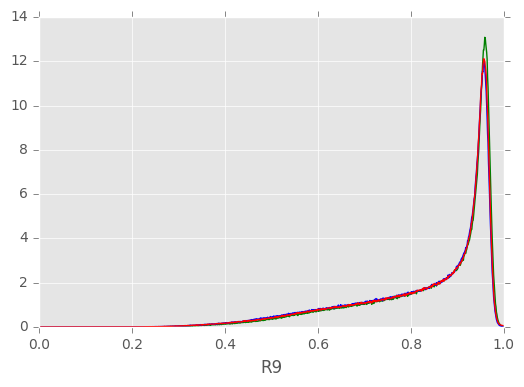

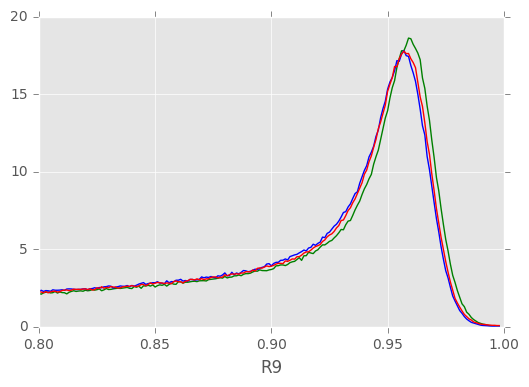

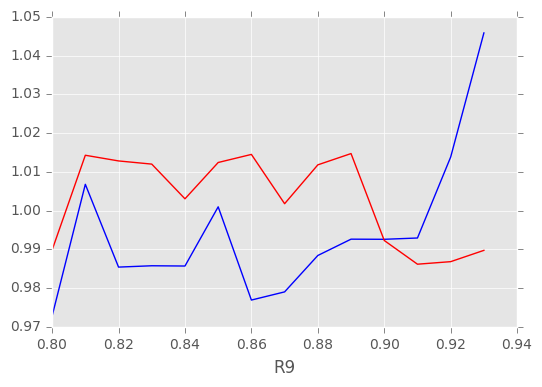

In [7]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
        rv3 = np.arange(0.8,0.95,0.01)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")
    
    
    #ratio plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc[yvar], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc[yvarcorr], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]
    
    h1 = data_bins/mc_bins
    h2 = data_bins/mccorr_bins
    
    plt.plot(edges,h1,"b")
    plt.plot(edges,h2,"r")


In [8]:
#our variables are dfmc and dfdata, let's work with them.
#let's see how the profiles generally are.

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

def Profile(x,y,nbins,xmin,xmax,ax, color):
    df = DataFrame({'x' : x , 'y' : y})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    for bin in bins:
        ProfileFrame.ix[bin,'ymean']      = df.ix[df['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev']  = df.ix[df['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax



plotting  R9


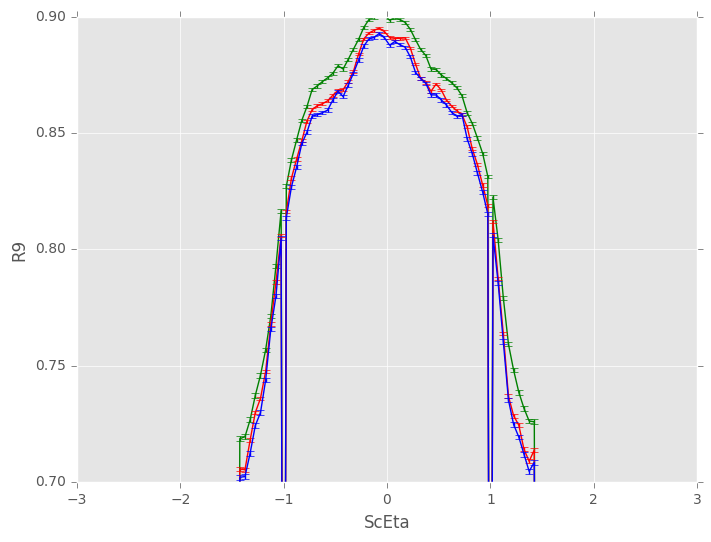

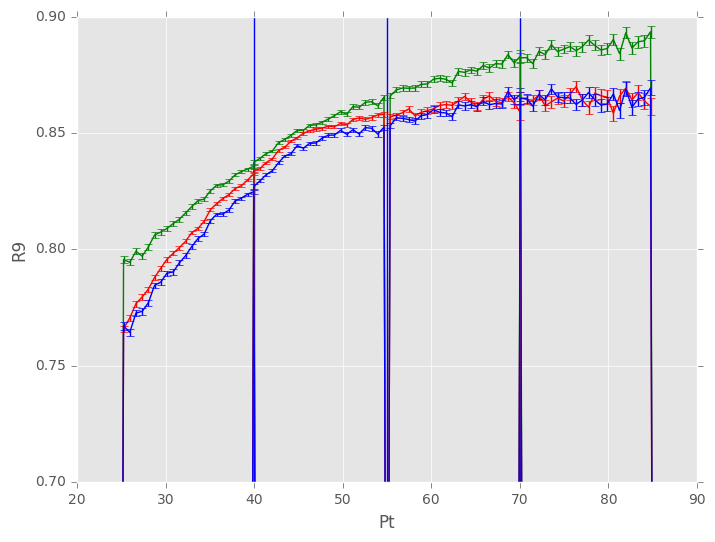

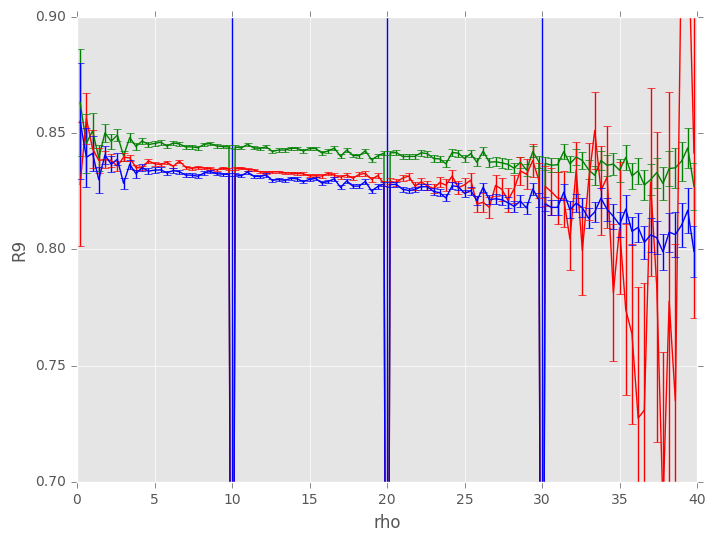

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')


# split profiles in 4 sections in scEta
dfmcEB1   = dfmc  .query('-1< ScEta & ScEta <1') # ('abs(ScEta)<1')
dfmcEB2   = dfmc  .query('(-1.5< ScEta & ScEta <-1) | (1 < ScEta & ScEta <1.5)') # ('1<abs(ScEta)<1.5')

dfmcEE1   = dfmc  .query('(-2< ScEta & ScEta <-1.5) | (1.5 < ScEta & ScEta <2)') # ('1.5<abs(ScEta)<2')
dfmcEE2   = dfmc  .query('(-2.5< ScEta & ScEta <-2) | (2 < ScEta & ScEta <2.5)') # ('2<abs(ScEta)<2.5')

dfdataEB1   = dfdata  .query('-1< ScEta & ScEta <1') # ('abs(ScEta)<1')
dfdataEB2   = dfdata  .query('(-1.5< ScEta & ScEta < -1) | (1 < ScEta & ScEta <1.5)') # ('1<abs(ScEta)<1.5')

dfdataEE1   = dfdata  .query('(-2< ScEta & ScEta <-1.5) | (1.5 < ScEta & ScEta <2)') # ('1.5<abs(ScEta)<2')
dfdataEE2   = dfdata  .query('(-2.5< ScEta & ScEta <-2) | (2< ScEta & ScEta <2.5)') # ('2<abs(ScEta)<2.5')

# split profiles in 4 sections in Pt

dfmcPt1   = dfmc  .query('25< Pt & Pt <40') 
dfmcPt2   = dfmc  .query('40< Pt & Pt <55') 
dfmcPt3   = dfmc  .query('55< Pt & Pt <70') 
dfmcPt4   = dfmc  .query('70< Pt & Pt <85') 

dfdataPt1   = dfdata  .query('25< Pt & Pt <40') 
dfdataPt2   = dfdata  .query('40< Pt & Pt <55') 
dfdataPt3   = dfdata  .query('55< Pt & Pt <70') 
dfdataPt4   = dfdata  .query('70< Pt & Pt <85') 

# split profiles in 4 sections in Rho
dfmcRho1   = dfmc  .query('0< rho & rho <10')
dfmcRho2   = dfmc  .query('10< rho & rho <20')
dfmcRho3   = dfmc  .query('20< rho & rho <30')
dfmcRho4   = dfmc  .query('30< rho & rho <40')

dfdataRho1   = dfdata  .query('0< rho & rho <10')
dfdataRho2   = dfdata  .query('10< rho & rho <20')
dfdataRho3   = dfdata  .query('20< rho & rho <30')
dfdataRho4   = dfdata  .query('30< rho & rho <40')


for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
   # ax.axvline(x=1)
   # ax.axvline(x=-1)
   # ax.axvline(x=1.5)
   # ax.axvline(x=-1.5)
   # ax.axvline(x=2)
   # ax.axvline(x=-2)
    
    Profile(dfmcEB1['ScEta']  , dfmcEB1[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEB1['ScEta'], dfdataEB1[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEB1['ScEta']  , dfmcEB1[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
      
    Profile(dfmcEB2['ScEta']  , dfmcEB2[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEB2['ScEta'], dfdataEB2[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEB2['ScEta']  , dfmcEB2[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

    Profile(dfmcEE1['ScEta']  , dfmcEE1[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEE1['ScEta'], dfdataEE1[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEE1['ScEta']  , dfmcEE1[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
    
    Profile(dfmcEE2['ScEta']  , dfmcEE2[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdataEE2['ScEta'], dfdataEE2[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmcEE2['ScEta']  , dfmcEE2[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')

   
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=40)
    ax.axvline(x=55)
    ax.axvline(x=70)
    
    Profile(dfmcPt1['Pt']  , dfmcPt1[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt1['Pt'], dfdataPt1[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt1['Pt']  , dfmcPt1[yvar+'_corr'],100,20.,90.,ax, 'blue')

    Profile(dfmcPt2['Pt']  , dfmcPt2[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt2['Pt'], dfdataPt2[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt2['Pt']  , dfmcPt2[yvar+'_corr'],100,20.,90.,ax, 'blue')
    
    Profile(dfmcPt3['Pt']  , dfmcPt3[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt3['Pt'], dfdataPt3[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt3['Pt']  , dfmcPt3[yvar+'_corr'],100,20.,90.,ax, 'blue')
    
    Profile(dfmcPt4['Pt']  , dfmcPt4[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdataPt4['Pt'], dfdataPt4[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmcPt4['Pt']  , dfmcPt4[yvar+'_corr'],100,20.,90.,ax, 'blue')


    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=10)
    ax.axvline(x=20)
    ax.axvline(x=30)
    
    Profile(dfmcRho1['rho']  , dfmcRho1[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho1['rho'], dfdataRho1[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho1['rho']  , dfmcRho1[yvar+'_corr'],100,0.,40.,ax, 'blue')
    
    Profile(dfmcRho2['rho']  , dfmcRho2[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho2['rho'], dfdataRho2[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho2['rho']  , dfmcRho2[yvar+'_corr'],100,0.,40.,ax, 'blue')
    
    Profile(dfmcRho3['rho']  , dfmcRho3[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho3['rho'], dfdataRho3[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho3['rho']  , dfmcRho3[yvar+'_corr'],100,0.,40.,ax, 'blue')
    
    Profile(dfmcRho4['rho']  , dfmcRho4[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdataRho4['rho'], dfdataRho4[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmcRho4['rho']  , dfmcRho4[yvar+'_corr'],100,0.,40.,ax, 'blue')
